In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Specifikuj cestu k souboru CSV
FILENAME = 'transcribe_results.csv'

# Načtení CSV souboru do DataFrame
data = pd.read_csv(FILENAME)
data

,source_speaker,target_speaker,ref_file,ref_content,gen_file,gen_content,score
0,p225,p226,../data/data/p225-val/1.wav,it is a common problem six spoons of fresh sn...,../data/converted_sound/p225/1.wav,it is a common problem 6 spoons of fresh slow...,88.23529
1,p225,p226,../data/data/p225-val/10.wav,in existence for alan the action reflects a s...,../data/converted_sound/p225/10.wav,in existence alan the action reflects a slump...,81.81818
2,p225,p226,../data/data/p225-val/11.wav,he will go a long way irvine said his company...,../data/converted_sound/p225/11.wav,he will go a long way irvine said his company...,100.00000
3,p225,p226,../data/data/p225-val/12.wav,overall it was a promising day for the scots ...,../data/converted_sound/p225/12.wav,overall it was a promising day for the scots ...,85.00000
4,p225,p226,../data/data/p225-val/13.wav,it was a close call everything happened so qu...,../data/converted_sound/p225/13.wav,it was a close call everything happened so qu...,100.00000
...,...,...,...,...,...,...,...
115,p230,p229,../data/data/p230-val/101.wav,i'm afraid to say anything no evidence that i...,../data/converted_sound/p230/101.wav,i'm afraid to say anything no evidence that i...,100.00000
116,p230,p229,../data/data/p230-val/107.wav,for her brother bob i can hardly believe it w...,../data/converted_sound/p230/107.wav,for her brother bob i can hardly believe it w...,100.00000
117,p230,p229,../data/data/p230-val/102.wav,we have to build a new team in the minimum of...,../data/converted_sound/p230/102.wav,we have to build a new team in the minimum of...,100.00000
118,p230,p229,../data/data/p230-val/10.wav,a patent certainly the taliban regime is fini...,../data/converted_sound/p230/10.wav,a patent certainly the taliban regime is fini...,93.75000


In [9]:
result_summary = data.groupby(['source_speaker', 'target_speaker']).agg({'score': ['mean', 'std', 'max', lambda x: f"{(x == 100).sum()}/10"]})
result_summary.columns = ['mean_score', 'std_deviation', 'max_score', 'match_count']
result_summary = result_summary.sort_values(by='mean_score', ascending=False)

result_summary

,,mean_score,std_deviation,max_score,match_count
source_speaker,target_speaker,,,,
p256,p254,92.823480,7.781361,100.00000,4/10
p226,p225,90.841308,8.933704,100.00000,4/10
p225,p226,90.710763,6.214223,100.00000,2/10
p228,p227,90.706065,7.637968,100.00000,1/10
p227,p228,89.861965,7.588810,100.00000,3/10
p230,p229,89.270990,13.537505,100.00000,4/10
p243,p232,88.852141,8.736484,100.00000,2/10
p223,p243,88.686820,6.812225,100.00000,1/10
p229,p230,87.842987,5.293579,96.42857,0/10


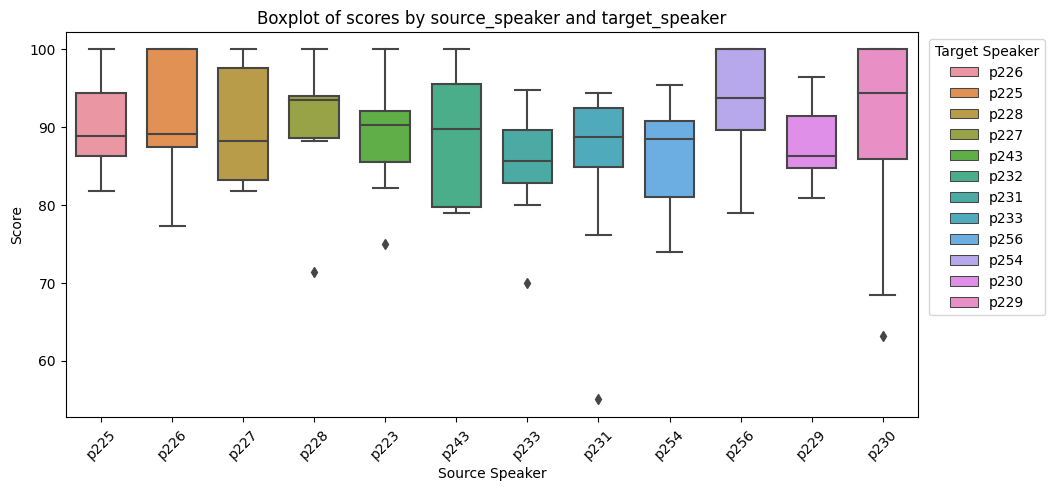

In [37]:
# Vytvoření boxplotu pro skóre podle kombinace source_speaker a target_speaker
plt.figure(figsize=(11, 5))
sns.boxplot(x='source_speaker', y='score', hue='target_speaker', data=data, width=0.7, dodge=False)
plt.title('Boxplot of scores by source_speaker and target_speaker')
plt.xlabel('Source Speaker')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Target Speaker', bbox_to_anchor=(1.005, 1), loc='upper left')
plt.show()